In [1]:
import os, random, copy
import seaborn as sns
import pandas as pd
import numpy as np
from os.path import join as opj
import matplotlib.pyplot as plt
from utils import ci_95, calc_p
from scipy.io import loadmat

%matplotlib inline


CUR_DIR = os.getcwd()
DATA_DIR = opj(CUR_DIR, 'data')
BOOTSTRAP_DIR = opj(DATA_DIR, 'parsed_questions_bootstrap')

# Note <a name="Note"></a>

<p><b>"cor_gen" : </b> MDS correlation between Woven and human</p>
<p><b>"cor_genab" : </b> MDS correlation between Woven-ablation and human</p>
<p><b>"cor_cnn" : </b> MDS correlation between DNN and human</p>
<p><b>"cor_genab2" : </b> MDS correlation between Ablation+ and human</p>
<p><b>"cor_cnn2" : </b> MDS correlation between Best-corr. DNN and human</p>

Task: stiff



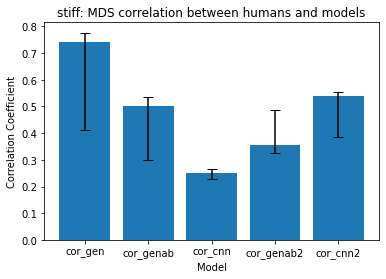

Task: mass



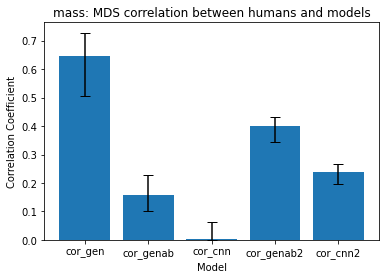

In [2]:
COND_ALL = ['stiff', 'mass']

for COND in COND_ALL:
    COND_F = pd.read_csv(opj(DATA_DIR, f'parsed_questions_{COND}.csv'))

    in_file = opj(DATA_DIR, 'nmds', f'{COND}.mat')
    nmds_data = loadmat(in_file)
    models = ['cor_gen', 'cor_genab', 'cor_cnn', 'cor_genab2', 'cor_cnn2']
    plot_pd = []
    print(f"Task: {COND}\n")
    for _model in models:
        cur_ci = ci_95(nmds_data[_model])
        plot_pd += [list(cur_ci)]


    mean_mds_f = f'scripts/nmds/output/embed_after_align_{COND}.mat'
    mean_mds_data = loadmat(mean_mds_f)
    mean_ls = [mean_mds_data['r_woven_human'][0][0], 
               mean_mds_data['r_wovenab_human'][0][0], 
               mean_mds_data['r_dnn_human'][0][0],
               mean_mds_data['r_wovenab2_human'][0][0],
               mean_mds_data['r_dnn2_human'][0][0]]

    df = pd.DataFrame(plot_pd, columns=['lower', 'higher'])
    df['mean'] = mean_ls
    df['name'] = models


    errors = df['mean'] - df['lower'], df['higher'] - df['mean']

    fig, ax = plt.subplots()
    ax.bar(df['name'], df['mean'], yerr=errors, capsize=5)
    ax.set_xlabel('Model')
    ax.set_ylabel('Correlation Coefficient')
    ax.set_title(f'{COND}: MDS correlation between humans and models')
    # plt.savefig(opj(f'nmds_cor_{COND}.svg'), format="svg", dpi=300)

    plt.show()